# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, Data/wine.mat

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1 Load the data into Python using the scipy.io.loadmat() function. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. Plot new box plot and histogram for these attributes and compare them with initial ones.
 + *You can use the scipy.stats.zscore() to standardize your data before you plot a boxplot.*
 + *You can use the function matplotlib.pyplot.subplot() to plot several plots in one figure.*


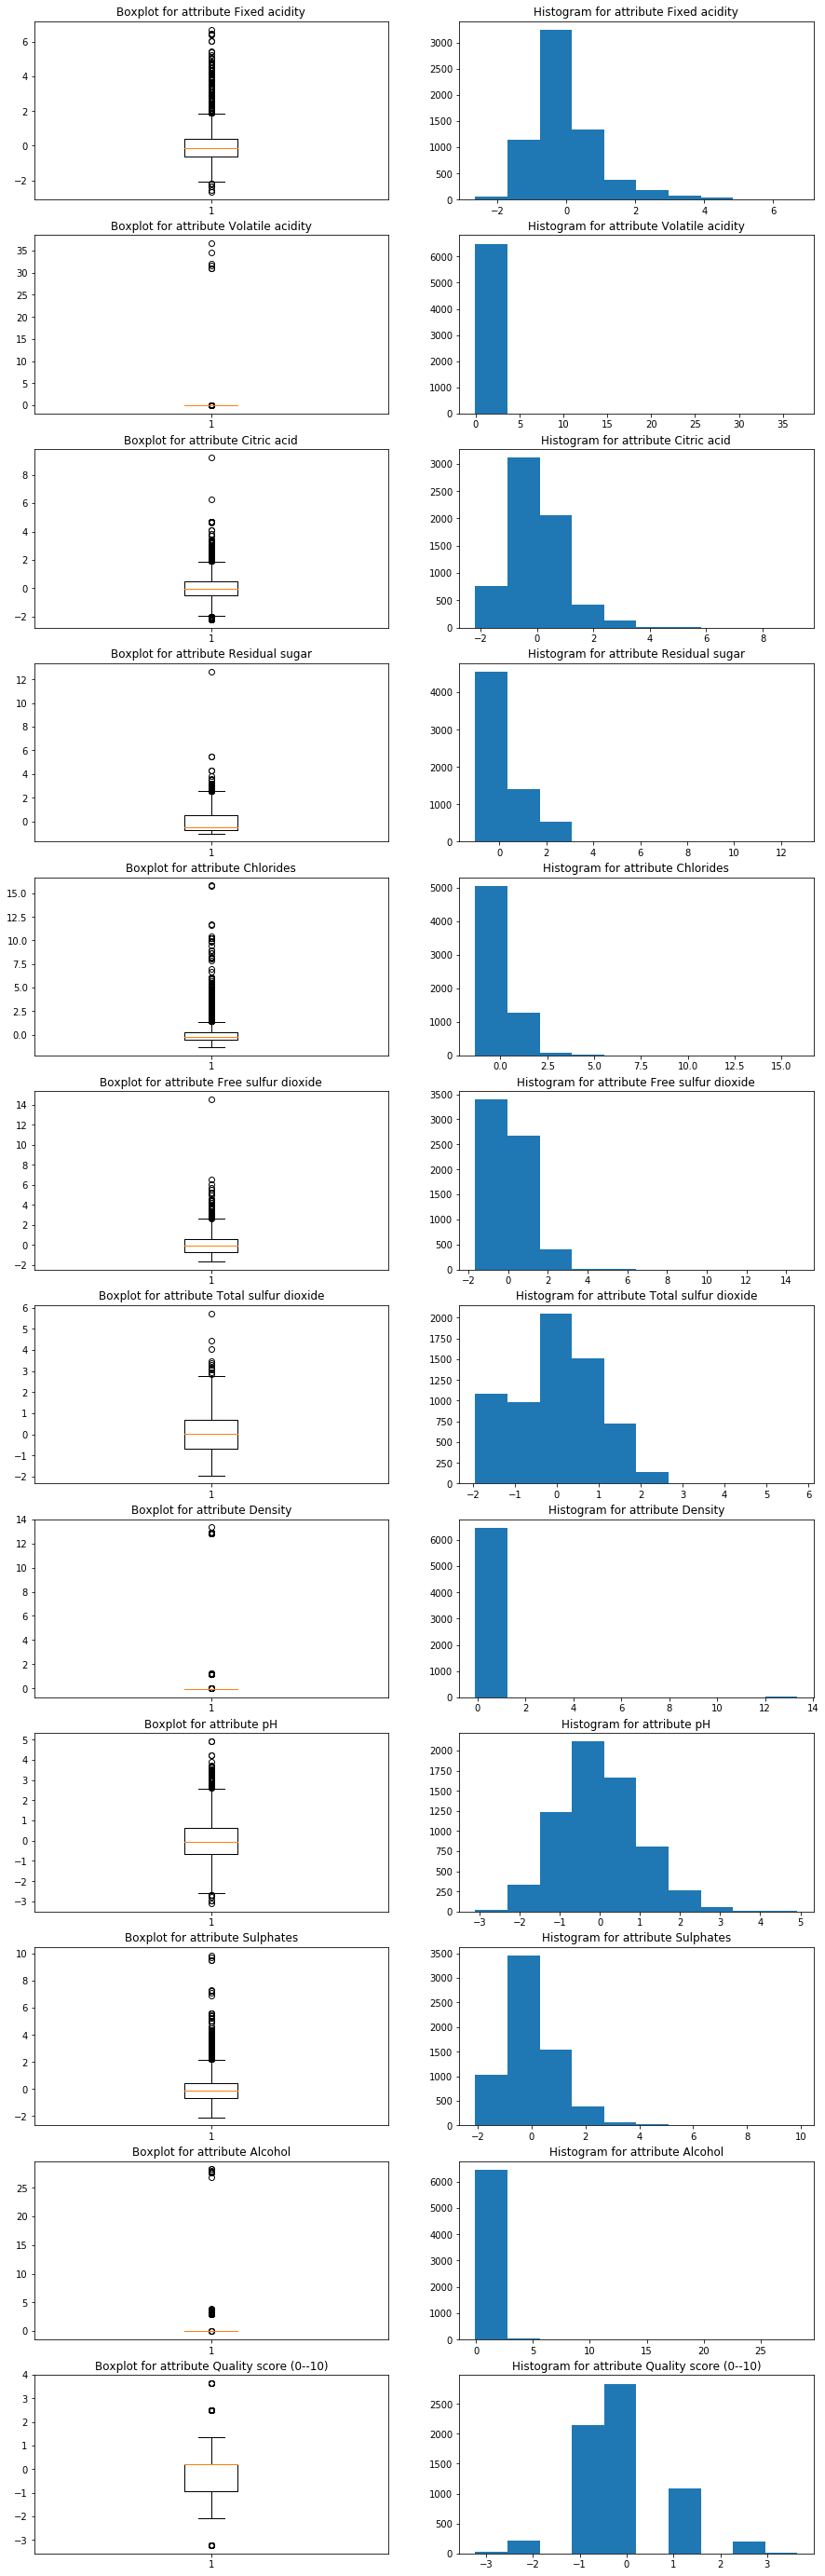

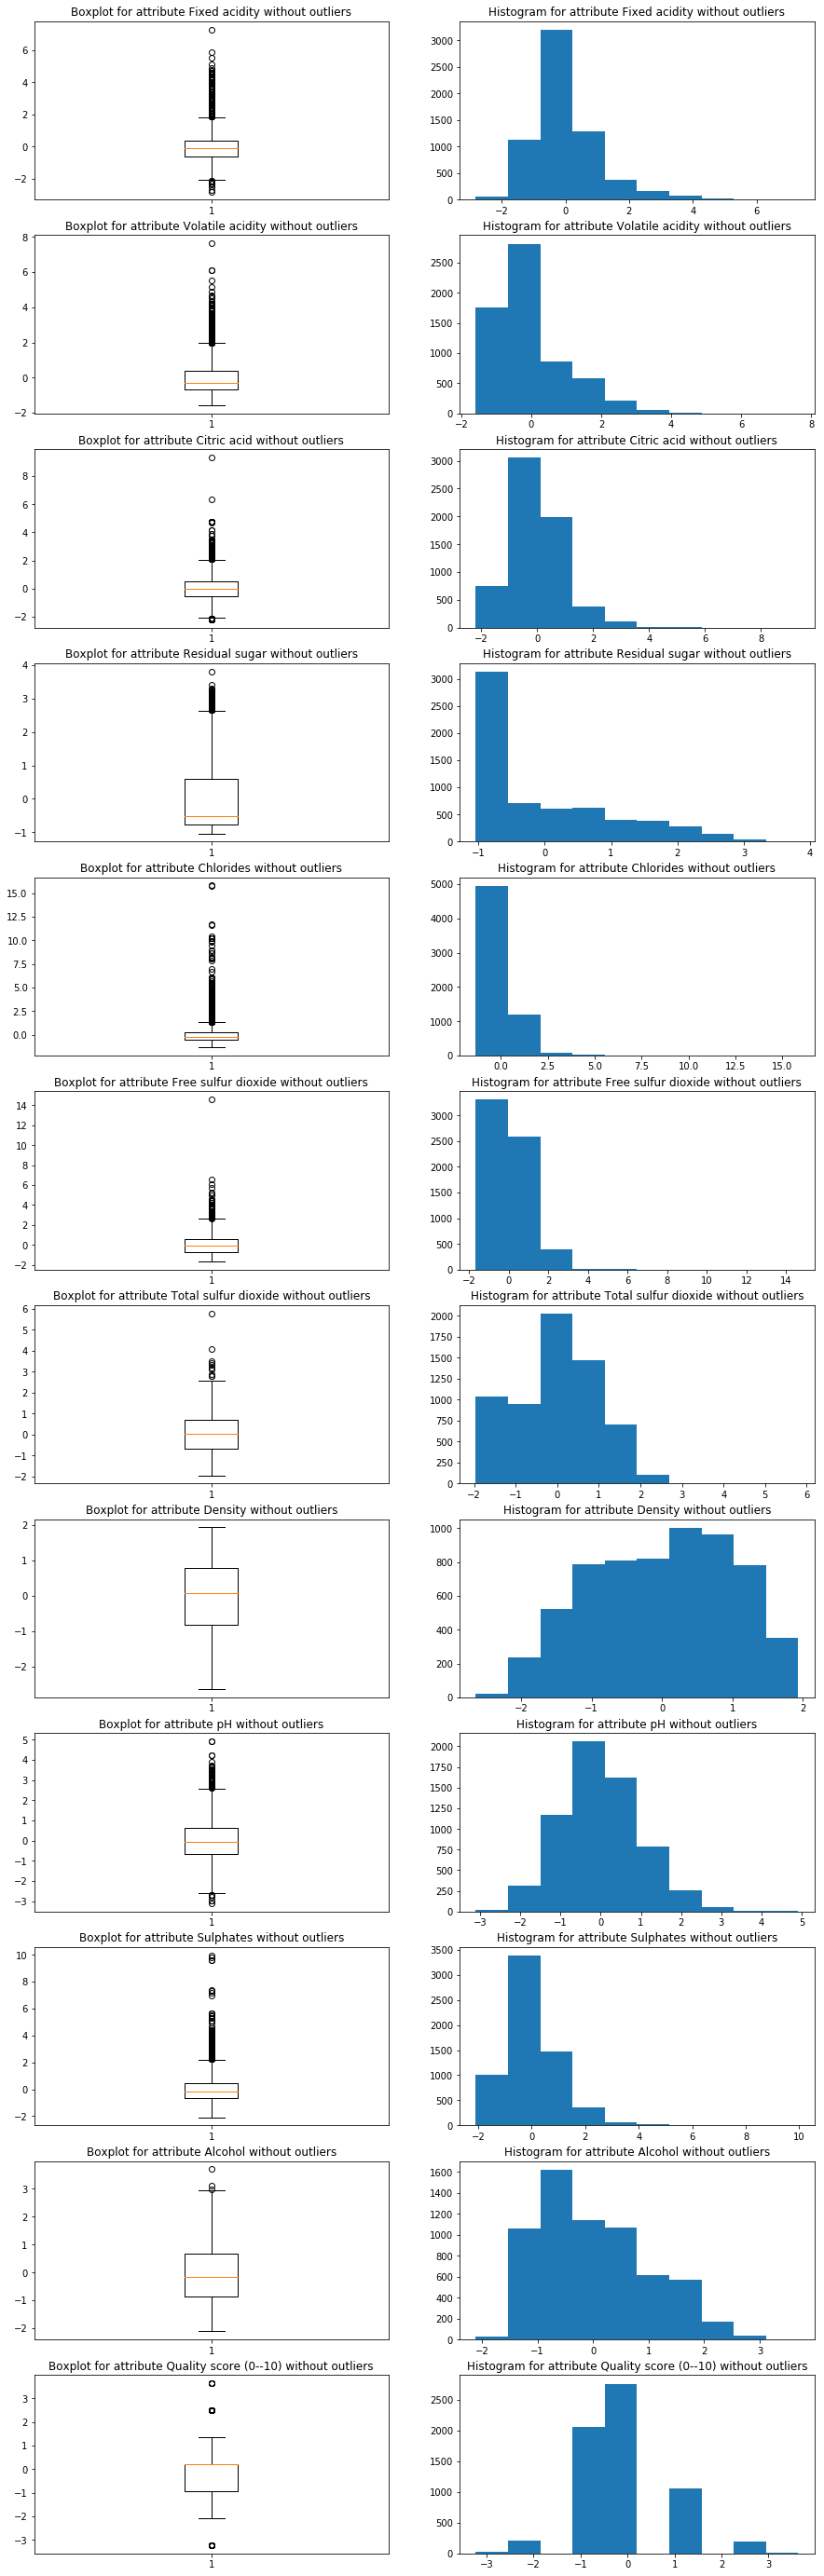

In [34]:
from scipy.io import loadmat
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

## Importing the data
data_raw = loadmat("Data/wine.mat")
attributeNames = data_raw["attributeNames"][0]
data = data_raw["X"]


zscores = zscore(data) ## Just used for plotting.

## Plotting
f, axes = plt.subplots(12,2)
f.set_figheight(50)
f.set_figwidth(15)
for index, axis in enumerate(axes):
    axis[0].boxplot(zscores[:,index])
    axis[0].set_title("Boxplot for attribute {}".format(attributeNames[index][0]))
    axis[1].hist(zscores[:,index])
    axis[1].set_title("Histogram for attribute {}".format(attributeNames[index][0]))

## Define maxima
max_vol_ac = 20 # index 1
max_dens = 10 # index 7
max_alc = 100 # index 10 Because 200% doesn't make sense since 100% is the physical maximum. 

## Remove outliers
indeces = np.where(data[:,1]>max_vol_ac)
data = np.delete(data, indeces, axis=0)
indeces = np.where(data[:,7]>max_dens)
data = np.delete(data, indeces, axis=0)
indeces = np.where(data[:,10]>max_alc)
data = np.delete(data, indeces, axis=0)

zscores = zscore(data) ## Just used for plotting.

## Plotting
f, axes = plt.subplots(12,2)
f.set_figheight(50)
f.set_figwidth(15)
for index, axis in enumerate(axes):
    axis[0].boxplot(zscores[:,index])
    axis[0].set_title("Boxplot for attribute {} without outliers".format(attributeNames[index][0]))
    axis[1].hist(zscores[:,index])
    axis[1].set_title("Histogram for attribute {} without outliers".format(attributeNames[index][0]))
    

## Answer to question 2.1.1: 

When comparing the new boxplots and histograms, we can see that the attributes where the outliers were removed are much more normally distributed. This means that we got exactly what we wanted.    


> 2.1.2 Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine?
+ *You can calculate the correlation coefficient using the scipy.stats.pearsonr() function to measure the strength of association.*

Correlation between wine quality and Fixed acidity : -0.08 with significance 0.0000
Correlation between wine quality and Volatile acidity : -0.26 with significance 0.0000
Correlation between wine quality and Citric acid : 0.09 with significance 0.0000
Correlation between wine quality and Residual sugar : -0.03 with significance 0.0107
Correlation between wine quality and Chlorides : -0.20 with significance 0.0000
Correlation between wine quality and Free sulfur dioxide : 0.06 with significance 0.0000
Correlation between wine quality and Total sulfur dioxide : -0.04 with significance 0.0016
Correlation between wine quality and Density : -0.32 with significance 0.0000
Correlation between wine quality and pH : 0.02 with significance 0.1069
Correlation between wine quality and Sulphates : 0.04 with significance 0.0026
Correlation between wine quality and Alcohol : 0.45 with significance 0.0000


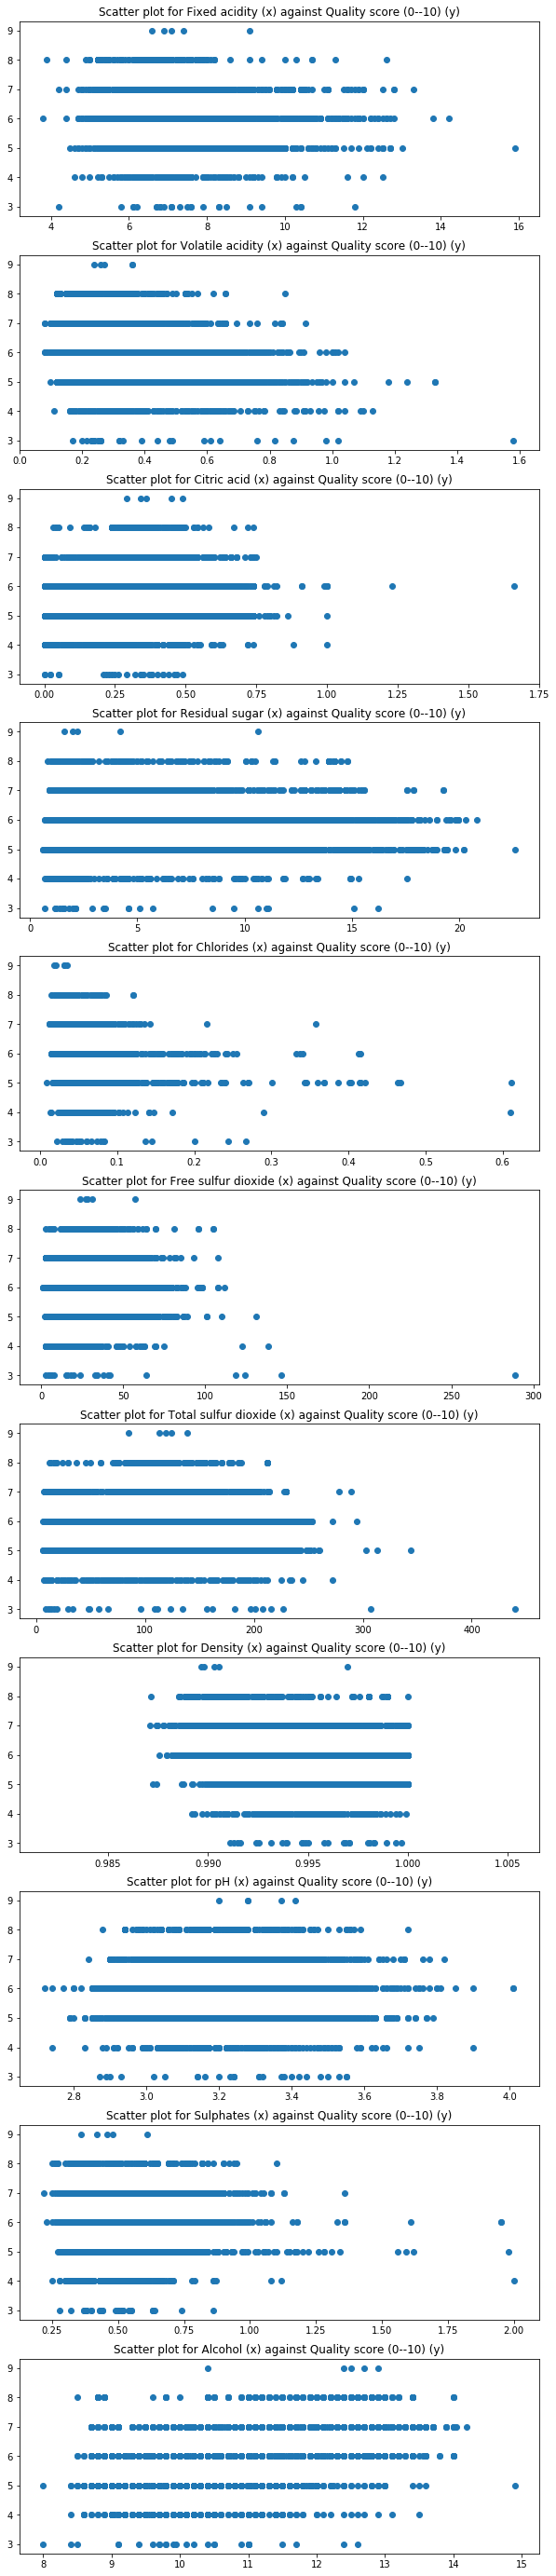

In [70]:
from scipy.stats import pearsonr 

wine_quality = data[:,11]
rvalues = [] ## Pearsonr values
f, axes = plt.subplots(11)
f.set_figheight(50)
f.set_figwidth(10)
for index, axis in enumerate(axes):
    axis.set_title("Scatter plot for {} (x) against {} (y)".format(attributeNames[index][0], attributeNames[11][0]))
    axis.scatter(data[:,index], wine_quality)
    rvalues.append(pearsonr(data[:,index], wine_quality)) ## Calculate correlation.

for index, values in enumerate(rvalues):
    print("Correlation between wine quality and {0} : {1:.2f} with significance {2:.4f}".format(attributeNames[index][0], rvalues[index][0], rvalues[index][1]))

## Answers to 2.1.2:

### Manual indentification:
We can see a few correlations by eye. 

First off, the wines with a high score, mostly have low volatile acidity, so there might be a negative linear relationship between volutile acidity and quality score.

For chlorides, the same holds, the high scoring wines mostly have a low chloride level. However, it does look like most wines overall have very low chloride level, which would mean that this is not really a relation, but just the sheer number of wines with a low chloride level makes it more likely that high-scoring wines have a low level of chloridity. 

Last off, there seems to be a linear relationship between alcohol level and quality score, where in general, higher scoring wines have a higher alcohol level. 

In general, there seems to be a normal distribution a normal distribution around the rating 6, which makes sense since there probably will be a lot of average wines, and not a lot of really bad and really good wines.

### Calculated:
The coefficients show us that the highest correlated attributes with wine quality are in descending order: alcohol, density, volatile acidity and chlorides, all of them significant (p < 0.05). This means we 'found' most of these by eye. In hindsight, you can see a slight correlation in the density graph. 

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. Visualize the first 10 digits as images. 
Next, compute the principal components (PCA) of the data matrix. Now,
using the PCA, create a new data matrix *Xpca*. The new data matrix should have 4 attributes corresponding to PC1-PC4. Reconstruct the initial data using PC1-PC4. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
Make a matrix of scatter plots of each combination of two principal components
for PC1-PC4 against each other. Make a 3-dimensional scatter plot of three
principal components PC1-PC3. Plot elements belonging to different classes in
different colors. Add a legend to clarify which digit is shown in which color.
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use * **Z** = **Y**\***V**[:,:4] to project the data onto the first four PCs.*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *


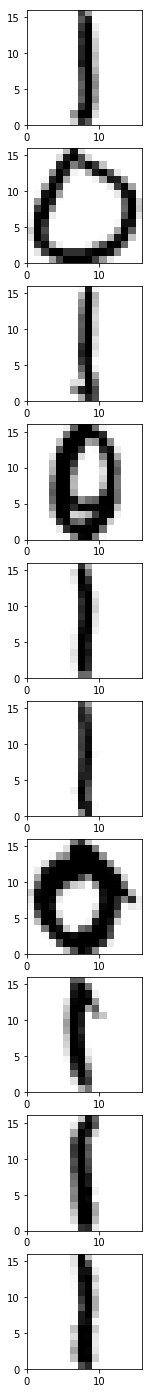

In [88]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']

X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
# plt.subplot(1,1,1);
# I = reshape(X[i,:],(16,16))
# plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
# plt.title('Digit as an image');
# plt.show()
#------------------------------------------------

#print(y[i])

# Remove all entrees that are higher than 1.
indices = np.where(y > 1)
y = np.delete(y, indices)
X = np.delete(X, indices, axis = 0)

# Visualise first 10.
f, axes = plt.subplots(10)
f.set_figheight(25)
f.set_figwidth(10)
for index, axis in enumerate(axes):
    I = reshape(X[index,:],(16,16))
    axis.imshow(I, extent = (0,16,0,16), cmap = cm.gray_r)
    

*Double click to type your elaboration for question 2.2.1 here*

In [ ]:
##Answer to question 2.2.1


*Double click to type your elaboration for question 2.2.1 here*

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [ ]:
##Answer to question 2.3.1

> ii. List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [ ]:
##Answer to question 2.3.2

> iii. Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [ ]:
##Answer to question 2.3.3

> iv. Verify the Central Limit Theorem: (i) compare the population
mean with the mean of both sample means; (ii) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

*Double click to type your answer for question 2.3.4 here*

> v. Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

In [ ]:
##Answer to question 2.3.5